11501568/11490434 [==============================] - 0s 0us/step


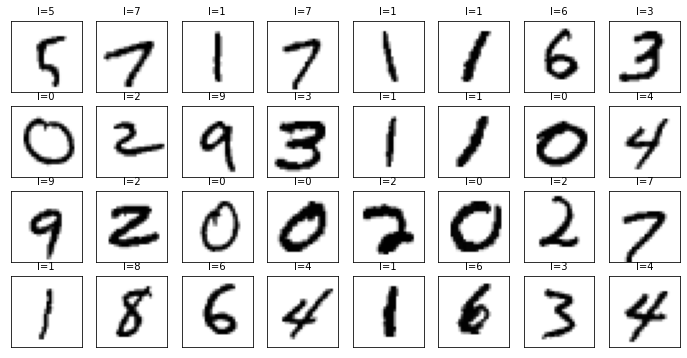

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 25)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4225)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                42260     
Total params: 42,510
Trainable params: 42,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
250/250 - 30s - loss: 0.6059 - accuracy: 0.8416 - val_loss: 0.3546 - val_accuracy: 0.9015
Epoch 2/5
250/250 - 1s - loss: 0.2309 - accuracy: 0.9324 - val_loss: 0.2615 - val_accuracy: 0.9230
Epoch 3/5
250/250 - 1s - loss: 0.1630 - accuracy: 0

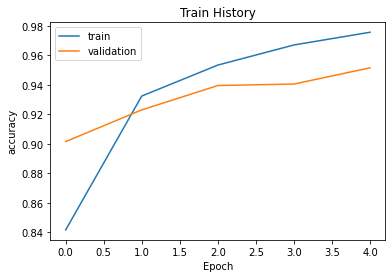

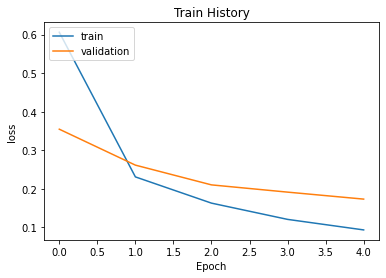

313/313 [==============================] - 1s 4ms/step - loss: 0.1340 - accuracy: 0.9611

	[Info] Accuracy of testing data = 96.1%
	[Info] Making prediction to x_test_norm

	[Info] Show 10 prediction result (From 0):
[7 2 1 0 4 1 4 9 6 9]



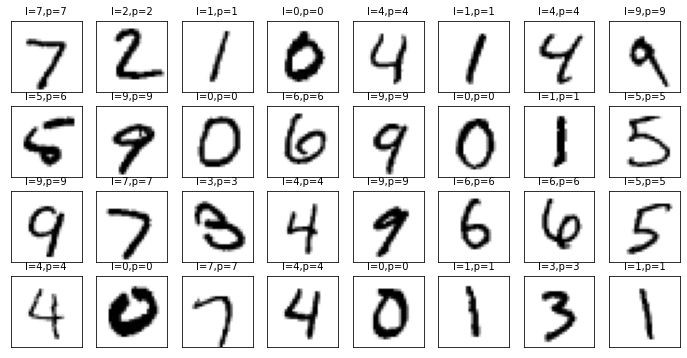

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
np.random.seed(10)

(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

def plot_multiimages(images, labels, prediction, idx, num=32):
    fig, ax = plt.subplots(4, 8, figsize=(12, 6))
    if num > 32: num = 32
    for i in range(0, num):  
        ax=plt.subplot(4,8, 1+i)
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()
plot_multiimages(x_train_image, y_train_label, [], 100, 32)

x_train = x_train_image.reshape(len(x_train_image), 28, 28, 1).astype('float32')
x_test = x_test_image.reshape(len(x_test_image), 28, 28, 1).astype('float32')
x_train_norm = x_train/255  
x_test_norm = x_test/255
y_TrainOneHot = utils.to_categorical(y_train_label)
y_TestOneHot = utils.to_categorical(y_test_label)

# Build a neural network
model = Sequential()
model.add(Conv2D(filters=25, kernel_size=(3,3), padding='valid', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax')) 
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_train_norm[0:10000], y=y_TrainOneHot[0:10000], validation_split=0.2, epochs=5, batch_size=32, verbose=2)

def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()
show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

scores = model.evaluate(x_test_norm, y_TestOneHot)
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))
print("\t[Info] Making prediction to x_test_norm")

# Making prediction and save result to prediction
prediction_prob = model.predict(x_test_norm[0:1000])
prediction = np.argmax(prediction_prob,axis=1)

print()
print("\t[Info] Show 10 prediction result (From 0):")
print("%s\n" % (prediction[0:10]))
plot_multiimages(x_test_image, y_test_label, prediction, idx=0)